# Polygon module: examples
    by Gerrit Nowald
Python module to calculate geometric properties of arbitrary 2D polygons:
- area, lengths of edges, inner angles
- order of vertices (clockwise or anti-clockwise)
- centroid (center of mass)
- for triangles: centers and radii of incircle and circumscribed (outer) circle
- check if point is inside or on edge of polygon
- volume and surface areas of solid of revolution
- second moment of area (bending stiffness of beams)
- translation, rotation and scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from polygon import polygon

## Calculate basic geometrical properties of a 2D shape
- Generate a polygon object from random vertices:

In [2]:
Vertices = np.random.rand(3,2)*10

triangle = polygon(Vertices)
print(triangle)
print(f'Vertices clockwise: {triangle.IsClockwise}')

Polygon with 3 vertices
Vertices clockwise: True


- Plot contour of polygon with middle points of edges as well as centroid (center of mass), circumscribed circle and incircle:

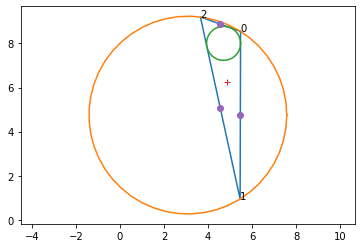

In [3]:
plt.figure()
triangle.plot(numbers=True)
triangle.plot_CircumscribedCircle()
triangle.plot_Incircle()
plt.plot(triangle.CenterMass[0],triangle.CenterMass[1],"+")
plt.plot(triangle.EdgesMiddle[:,0],triangle.EdgesMiddle[:,1],"o")
plt.axis('equal')
plt.show()

- Basic geometric properties:

In [4]:
print(f"Area: {np.round(abs(triangle),1)}")
print(f"Lengths of edges: {[np.round(Length,1) for Length in triangle.EdgesLength]}")
print(f"Inner angles: {[int(Angle) for Angle in triangle.Angles]}°")

Area: 6.9
Lengths of edges: [7.6, 8.4, 1.9]
Inner angles: [109, 12, 57]°


## Check if points are inside of a polygon
- generate a polygon object

In [5]:
Vertices = [
    [0, 0],
    [1.75, 4],
    [1.5, 6],
    [1, 7],
    [0.25, 6],
    [0, 5],
    [-0.25, 6],
    [-1, 7],
    [-1.5, 6],
    [-1.75, 4],
    ]

heart = polygon(Vertices)

- generate random points to be tested

In [6]:
N = 1000
points = np.hstack(( np.random.rand(N,1)*6 - 3, np.random.rand(N,1)*10 - 2 ))

- test points:

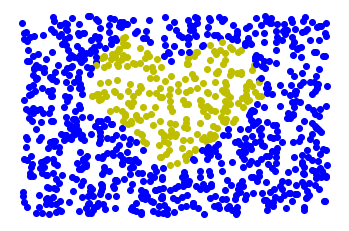

In [7]:
fig, ax = plt.subplots()
for point in points:
    if heart.isPointInside(point):
        style = "yo"
    else:
        style = "bo"
    plt.plot(point[0],point[1],style)
ax.set_axis_off()

## Calculate mass and surface areas of a rotational-symmetric body
Rotational symmetrical bodies can be described through their 2D cross-sections ([Pappus's centroid theorem](https://en.wikipedia.org/wiki/Pappus%27s_centroid_theorem)).
- define the cross-section and axis of rotation:

In [8]:
Vertices = [
    [2.5, 0],
    [4, 0],
    [4, 6],
    [2.5, 6],
    [1, 4.5],
    [1, 1.5]
]

socket = polygon(Vertices, axis=1)

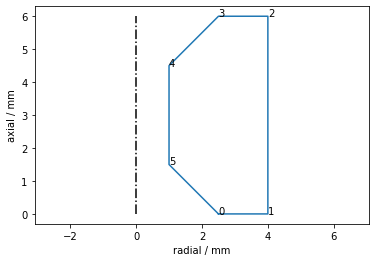

In [9]:
plt.figure()
socket.plot(numbers=True)
plt.plot([0,0],[0,6],'k-.')   # axis of rotation
plt.xlabel('radial / mm')
plt.ylabel('axial / mm')
plt.axis('equal')
plt.show()

- mass (socket out of brass):

In [10]:
rho = 8530  # density of brass / kg/m³
V = abs(socket)*(1e-3)**3   # volume of solid of revolution wrt y-axis / m³
m = V*rho
print(f"{np.round(m*1e3,3)} g")

2.231 g


- surface areas:

In [11]:
print(f"{[int(Area) for Area in socket.RotationSurfaces]} mm²")

[30, 150, 30, 23, 18, 23] mm²


## Calculate deflection of a steal beam under load
The deflection of beams under load can be calculated with the [Euler–Bernoulli beam theory](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory).
The stiffness of the beam is defined by its material and the shape of its cross-section. The latter can be described with the so-called second moment of area.
- define the cross-section:

In [12]:
Vertices = [
    [0, 0],
    [10, 0],
    [10, 1],
    [6, 2],
    [6, 18],
    [10, 19],
    [10, 20],
    [0, 20],
    [0, 19],
    [4, 18],
    [4, 2],
    [0, 1]
]

beam = polygon(Vertices)

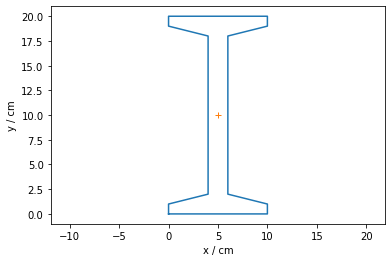

In [13]:
beam.plot()
plt.plot(beam.CenterMass[0],beam.CenterMass[1],"+")
plt.xlabel('x / cm')
plt.ylabel('y / cm')
plt.axis('equal')
plt.show()

- second moment of area:

In [14]:
print(f"bending around x-axis: {int(beam.SecondMomentArea[0])} cm^4")
print(f"bending around y-axis: {int(beam.SecondMomentArea[1])} cm^4")

bending around x-axis: 229 cm^4
bending around y-axis: 3380 cm^4


- deflection of the steal beam under a vertical load in the middle:

In [15]:
l = 5     # length of the beam / m
m = 2e3   # weight / kg

E = 210e9 # Young's modulus steel / Pa
g = 9.81  # gravity constant / m/s²

Iy = beam.SecondMomentArea[1]*(1e-2)**4  # second moment of area / m^4
F  = m*g           # force / N
c  = 48*E*Iy/l**3  # bending stiffness beam (pinned-pinned)
w  = F/c           # deflection in the middle / m

print(f'{np.round(w*1e3,1)} mm under a load of {m/1e3} t.')

7.2 mm under a load of 2.0 t.


## Manipulate polygon (move, rotate, scale)
- create polygon object

In [16]:
Vertices = [[0,0],[5,0],[5,2],[4,1]]
P = polygon(Vertices)

- translate, rotate, scale

In [17]:
Ptranslated = P + [3,4]
Protated = P.rotateClockwise(45,[5,0])
Pscaled = P / 2

- plot

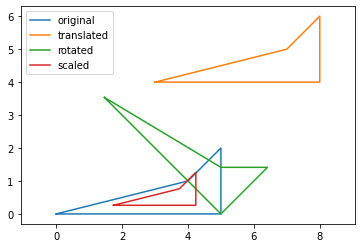

In [18]:
plt.figure()
P.plot()
Ptranslated.plot()
Protated.plot()
Pscaled.plot()
plt.legend(['original','translated','rotated','scaled'])
plt.axis('equal')
plt.show()